# Customer Churn Prediction
This notebook builds and evaluates machine learning models to predict customer churn.

### Importing Libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


##### Train Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [7]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [8]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [10]:
model_dt.score(x_test,y_test)

0.7853589196872779

In [11]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1047
           1       0.58      0.58      0.58       360

    accuracy                           0.79      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [12]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [13]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [14]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [15]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9207836456558773
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       559
           1       0.91      0.94      0.93       615

    accuracy                           0.92      1174
   macro avg       0.92      0.92      0.92      1174
weighted avg       0.92      0.92      0.92      1174



In [ ]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[486  39]
 [ 36 602]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [18]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [19]:
y_pred=model_rf.predict(x_test)

In [20]:
model_rf.score(x_test,y_test)

0.798862828713575

In [21]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1047
           1       0.64      0.50      0.56       360

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [22]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [23]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [24]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [25]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [26]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [27]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [28]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9332191780821918
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       507
           1       0.92      0.96      0.94       661

    accuracy                           0.93      1168
   macro avg       0.94      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168



In [29]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[455  52]
 [ 26 635]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [30]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [31]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [32]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [33]:
yr_predict_pca = model.predict(xr_test_pca)

In [34]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [35]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7174657534246576
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       507
           1       0.73      0.79      0.76       661

    accuracy                           0.72      1168
   macro avg       0.71      0.71      0.71      1168
weighted avg       0.72      0.72      0.72      1168



##### With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

#### Pickling the model

In [36]:
import pickle

In [37]:
filename = 'model.sav'

In [38]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [39]:
load_model = pickle.load(open(filename, 'rb'))

In [40]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [41]:
model_score_r1

0.9332191780821918

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.

## Model Evaluation
We evaluate our models using the following metrics:
- Accuracy
- Precision / Recall / F1-Score
- Confusion Matrix
- ROC-AUC Curve

### XGBoost Model
We will now train and evaluate an XGBoost classifier as part of our model comparison.

In [42]:

# XGBoost Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(x_train, y_train)

xgb_preds = xgb_model.predict(x_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1047
           1       0.58      0.52      0.55       360

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.78      0.78      0.78      1407

Confusion Matrix:
[[913 134]
 [172 188]]
ROC-AUC Score: 0.8095404860447839


### ROC Curve Comparison
This section visualizes the performance of all models by plotting their ROC curves and comparing AUC scores.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Feature Scaling
scaler = StandardScaler()
# Corrected variable names for training and testing data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Logistic Regression with increased iterations
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

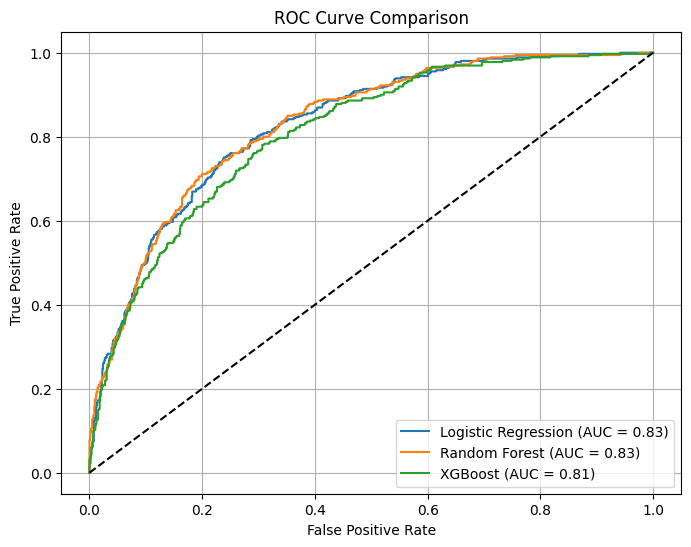

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for ROC Curve
logit_probs = log_model.predict_proba(X_test_scaled)[:, 1]
# Changed rf_model to model_rf to match the variable name used earlier in the notebook
rf_probs = model_rf.predict_proba(x_test)[:, 1]
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, logit_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

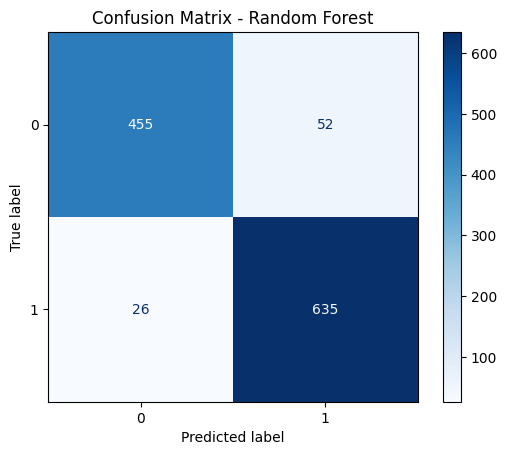

In [47]:

# Confusion Matrix for Random Forest
from sklearn.metrics import ConfusionMatrixDisplay # Import the new class
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4)) # You don't need to create a figure separately with ConfusionMatrixDisplay
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
# Make sure to use the correct model variable name, which is model_rf, not rf
ConfusionMatrixDisplay.from_estimator(model_rf_smote, xr_test1, yr_test1, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


<Figure size 800x600 with 0 Axes>

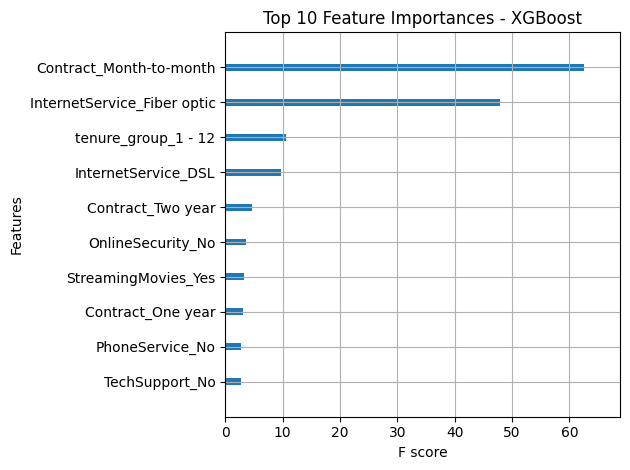

In [51]:

# Feature Importance for XGBoost
from xgboost import plot_importance
import matplotlib.pyplot as plt # Ensure matplotlib is imported if not already

plt.figure(figsize=(8, 6))
# Changed xgb to xgb_model to match the variable name
plot_importance(xgb_model, max_num_features=10, importance_type='gain', show_values=False)
plt.title('Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

